# Get 200D EMA for the next 'n' days considering Nifty stays between 24500 and 24000

In [11]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta

def get_stock_data(ticker, days):
    end_date = datetime.today()
    start_date = end_date - timedelta(days=days)
    stock = yf.Ticker(ticker)
    data = stock.history(start=start_date, end=end_date)
    return data

# Get the previous 200-day price of Nifty 50
nifty_50_data = get_stock_data("^NSEI", 299)
df = pd.DataFrame(nifty_50_data)

In [12]:
df.drop(['Dividends', 'Stock Splits', 'Volume', 'Open', 'High', 'Low'], axis=1, inplace=True)

In [13]:
df.reset_index(drop=True, inplace=True)

In [14]:
df.head()

,Close
0,21658.599609
1,21710.800781
2,21513.000000
3,21544.849609
4,21618.699219


<Axes: >

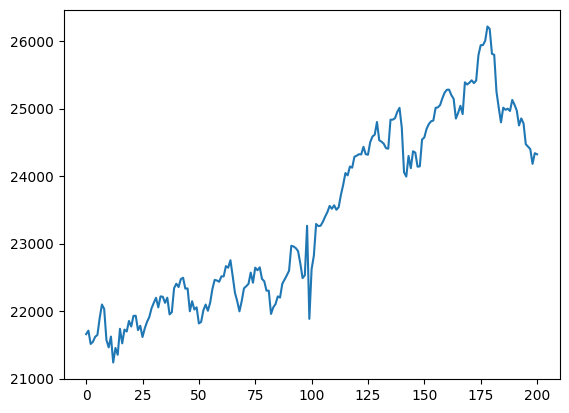

In [15]:
df['Close'].plot()

In [16]:
df['200_day_EMA'] = df['Close'].ewm(span=200, adjust=False).mean()

In [17]:
df

,Close,200_day_EMA
0,21658.599609,21658.599609
1,21710.800781,21659.119024
2,21513.000000,21657.665103
3,21544.849609,21656.542561
4,21618.699219,21656.166010
...,...,...
196,24435.500000,23734.061067
197,24399.400391,23740.681359
198,24180.800781,23745.060657
199,24339.150391,23750.971997


In [18]:
df.index = pd.to_datetime(df.index)

In [19]:
n = int(input("Enter the number of days in future for which you want to predict the EMA: "))

In [20]:
u = int(input("Upper limit range of Nifty 50"))
l = int(input("Lower limit range of Nifty 50"))

In [21]:
np.random.seed(0)
future_prices = np.linspace(l, u, n)
future_dates = [df.index[-1] + timedelta(days=x) for x in range(1, n+1)]  

future_df = pd.DataFrame(data=future_prices, index=future_dates, columns=['Close'])

df = pd.concat([df, future_df])

df.reset_index(drop=True, inplace=True) 
df = df.iloc[n:]
df['200_day_EMA'] = df['Close'].ewm(span=200, adjust=False).mean()

In [22]:
df

,Close,200_day_EMA
15,21737.599609,21737.599609
16,21522.099609,21735.455331
17,21725.699219,21735.358255
18,21697.449219,21734.981051
19,21853.800781,21736.163337
...,...,...
211,24714.285714,23831.636225
212,24785.714286,23841.129539
213,24857.142857,23851.239124
214,24928.571429,23861.958849


In [23]:
print("The EMA after the next", n, "days is: ", df['200_day_EMA'].iloc[-1], "for Nifty 50 between range of", l, "and", u)

The EMA after the next 15 days is:  23873.282641177095 for Nifty 50 between range of 24000 and 25000
